In [2]:

import pandas as pd

# load the data from csv file
df = pd.read_csv("FreshMart Analytics - Orders.csv")

# show the first 5 rows of the data
print(df.head())

# insure that there are no missing values   
print(df.isnull().sum())

# delete the rows with missing values
df = df.dropna()

# convert the 'Order_Date' column to datetime
df['Order_Date']=pd.to_datetime(df['Order_Date'])

# insure that the format is correct
print(df['Order_Date'].dtypes)
print(df.info())

   Order_ID  Order_Date  Product_ID  Sales_Rep_ID  Region_ID  Quantity_Sold  \
0      1001  2024-09-05         202           305        101              2   
1      1002  2023-12-13         204           301        105              1   
2      1003  2023-09-17         201           303        101              3   
3      1004  2022-12-24         204           301        105              2   
4      1005  2023-08-05         202           303        102              2   

   Unit_Price  Total_Sales  Profit  Return_Flag   Time  Year  Month  \
0         345          690     131        False  23:47  2024      9   
1          33           33       7        False  16:50  2023     12   
2         167          502     125        False  09:00  2023      9   
3         251          502     151        False  06:50  2022     12   
4         126          251      38        False  10:42  2023      8   

  Day_of_Week  Hour  
0    Thursday    23  
1   Wednesday    16  
2      Sunday     9  
3    Satur

In [3]:
total_sales = df["Total_Sales"].sum()
total_profit = df["Profit"].sum()

print(f"💰Total Sales: {total_sales:.2f}")
print(f"📈Total Profit: {total_profit:.2f}")


💰Total Sales: 2508068.00
📈Total Profit: 532987.00


In [4]:
#Average Basket Size
avg_basket_size = df["Quantity_Sold"].mean()
print(f"🛒 Average basket size {avg_basket_size:.2f} items")


🛒 Average basket size 5.41 items


In [5]:
# convert the 'Order_Date' column to datetime
df["Order_Date"] = pd.to_datetime(df["Order_Date"])

# create a new column "YearMonth" that represents the month and year
df["YearMonth"] = df["Order_Date"].dt.to_period("M")

# sum the total sales by month
monthly_sales = df.groupby("YearMonth")["Total_Sales"].sum()

# calculate the sales growth (MOM)
sales_growth_mom = monthly_sales.pct_change() * 100  # precentage

print("📊 The Sales Growth :")
print(sales_growth_mom)

📊 The Sales Growth :
YearMonth
2022-10           NaN
2022-11    432.963550
2022-12     28.878785
2023-01    -25.174159
2023-02    -15.553633
2023-03     28.851930
2023-04    -12.333400
2023-05     14.149861
2023-06     -1.181124
2023-07     -6.298820
2023-08      0.074977
2023-09     19.242713
2023-10    -24.495499
2023-11     13.638305
2023-12     16.651411
2024-01    -24.108566
2024-02     14.920386
2024-03    -24.508950
2024-04     25.133294
2024-05     12.169031
2024-06      8.387333
2024-07    -16.080220
2024-08     10.077923
2024-09    -21.991912
2024-10      3.338025
Freq: M, Name: Total_Sales, dtype: float64


In [6]:
# The best selling products
top_products = df.groupby("Product_ID")["Total_Sales"].sum().sort_values(ascending=False).head(5)
print("📊 The best selling products: ")
print(top_products)


📊 The best selling products: 
Product_ID
202    534999
204    504213
203    497528
205    487872
201    483456
Name: Total_Sales, dtype: int64


In [7]:
# analysis the sales by day of week
sales_by_day = df.groupby("Day_of_Week")["Total_Sales"].sum()

# analysis the sales by hour
sales_by_hour = df.groupby("Hour")["Total_Sales"].sum()

print("📊 The sales by day of week: ")
print(sales_by_day) 

📊 The sales by day of week: 
Day_of_Week
Friday       369475
Monday       298670
Saturday     377104
Sunday       328510
Thursday     390898
Tuesday      359390
Wednesday    384021
Name: Total_Sales, dtype: int64


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


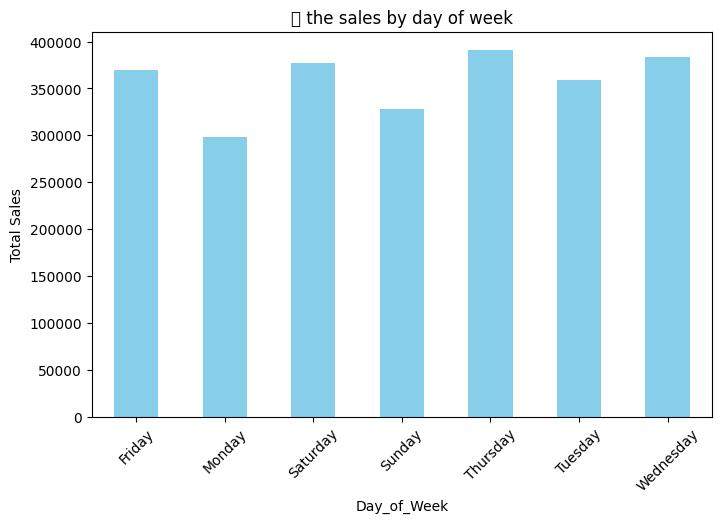

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


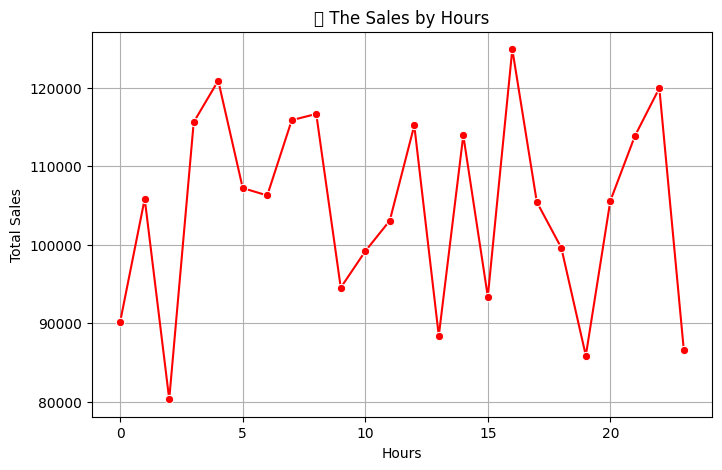

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# the sales by day of week
plt.figure(figsize=(8,5))
sales_by_day.plot(kind="bar", color="skyblue")
plt.title("📊 the sales by day of week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# the sales by hour
plt.figure(figsize=(8,5))
sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values, marker="o", color="red")
plt.title("⏳ The Sales by Hours")
plt.xlabel("Hours")
plt.ylabel("Total Sales")
plt.grid()
plt.show()
